In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [11]:
datafile = '/home/mmaisonnave/repositories/hrir-simulation-results/data/displaced_person_results.csv'

df = pd.read_csv(datafile, index_col=0)
print(df.shape)
df.head()

(9450, 18)


,Seed,Model,Ranking Function,Dataset,N,n,Effort,Accuracy,Precision,Recall,F1-Score,Relevant labeled,TP,TN,FP,FN,Prevalence,representation
Date,,,,,,,,,,,,,,,,,,
2022-11-23 17:40,2474260,logreg,relevance,displaced_persons,364,1,23,0.088867,0.088867,1.0,0.163229,9,645,0,6613,0,0.135577,bow
2022-11-23 17:40,2474260,logreg,relevance,displaced_persons,364,1,23,0.088867,0.088867,1.0,0.163229,9,645,0,6613,0,0.135577,bow
2022-11-23 17:40,2474260,logreg,relevance,displaced_persons,364,1,23,0.088867,0.088867,1.0,0.163229,9,645,0,6613,0,0.135577,bow
2022-11-23 17:40,2474260,logreg,relevance,displaced_persons,364,1,23,0.088867,0.088867,1.0,0.163229,9,645,0,6613,0,0.135577,bow
2022-11-23 17:41,2474260,logreg,relevance,displaced_persons,364,1,23,0.088867,0.088867,1.0,0.163229,9,645,0,6613,0,0.135577,bow


(1575, 18)


In [14]:
models = set(df['Model'])
ranking_functions = set(df['Ranking Function'])
Ns = set(df['N'])
ns = set(df['n'])
representations = set(df['representation'])

seed_count = 5

print(f'{"model":20}\t x{len(models)}')
print(f'{"ranking function":20}\t x{len(ranking_functions)}')
print(f'{"N":20}\t x{len(Ns)}')
print(f'{"n":20}\t x{len(ns)}')
print(f'{"representations":20}\t x{len(representations)}')
print(f'{"seeds":20}\t x{seed_count}')


model               	 x2
ranking function    	 x9
N                   	 x7
n                   	 x5
representations     	 x3
seeds               	 x5


In [19]:
# AVERAGING RESULTS FROM DIFFERENT SEEDS
count=0
data={}
for N in Ns:
    for n in ns:
        for model in models:
            for representation in representations:
                for ranking_function in ranking_functions:
                    auxdf=df[(df['Model']==model) & 
                             (df['N']==N) & (df['n']==n) &
                             (df['representation']==representation) &
                             (df['Ranking Function']==ranking_function) 
                            ]
                    assert auxdf.shape[0]==seed_count
                    
                    
                    auxdf=auxdf.drop(columns=['Dataset', 'representation', 'Ranking Function', 'Model'])
                    auxdict=auxdf.mean().to_dict()
                    if len(data)==0: # First iteration
                        for key in auxdict :
                            data[key]=[]
                        data['Model']=[]
                        data['representation']=[]
                        data['Ranking Function']=[]
                    for key in auxdict:
                        data[key].append(auxdict[key])
                    data['Model'].append(model)
                    data['representation'].append(representation)
                    data['Ranking Function'].append(ranking_function)



#                     count+=1
results = pd.DataFrame(data)
results['Dataset']='displaced_persons'
# results['Ranking Function']='relevance'
results

,Seed,N,n,Effort,Accuracy,Precision,Recall,F1-Score,Relevant labeled,TP,TN,FP,FN,Prevalence,Model,representation,Ranking Function,Dataset
0,2474260.0,364.0,1.0,23.0,0.221411,0.103158,1.000000,0.187023,4.0,650.0,957.0,5651.0,0.0,0.092308,svm,bow,uncertainty_with_avg_diversity,displaced_persons
1,2474260.0,364.0,1.0,23.0,0.094241,0.090230,1.000000,0.165524,2.0,652.0,32.0,6574.0,0.0,0.060577,svm,bow,relevance_with_avg_diversity,displaced_persons
2,2474260.0,364.0,1.0,23.0,0.089832,0.089832,1.000000,0.164855,2.0,652.0,0.0,6606.0,0.0,0.043269,svm,bow,uncertainty_with_min_diversity,displaced_persons
3,2474260.0,364.0,1.0,23.0,0.095619,0.090355,1.000000,0.165735,2.0,652.0,42.0,6564.0,0.0,0.060577,svm,bow,1quarter_relevance_3quarters_uncertainty,displaced_persons
4,2474260.0,364.0,1.0,23.0,0.089832,0.089832,1.000000,0.164855,2.0,652.0,0.0,6606.0,0.0,0.118269,svm,bow,relevance_with_min_diversity,displaced_persons
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1885,2474260.0,1820.0,20.0,570.0,0.928625,0.523524,0.994297,0.685902,128.0,523.0,5709.0,476.0,3.0,0.081346,logreg,sbert,relevance_with_min_diversity,displaced_persons
1886,2474260.0,1820.0,20.0,570.0,0.951721,0.623171,0.971483,0.759287,128.0,511.0,5876.0,309.0,15.0,0.080827,logreg,sbert,relevance,displaced_persons
1887,2474260.0,1820.0,20.0,570.0,0.951721,0.623171,0.971483,0.759287,128.0,511.0,5876.0,309.0,15.0,0.080827,logreg,sbert,3quarter_relevance_1quarters_uncertainty,displaced_persons
1888,2474260.0,1820.0,20.0,570.0,0.951721,0.623171,0.971483,0.759287,128.0,511.0,5876.0,309.0,15.0,0.080827,logreg,sbert,half_relevance_half_uncertainty,displaced_persons


In [28]:
# Fixed model and representation (based on experimentation on 20newsgroup)
results = results[(results['Model']=='logreg') & (results['representation']=='bow')]
print(results.shape)

(315, 18)


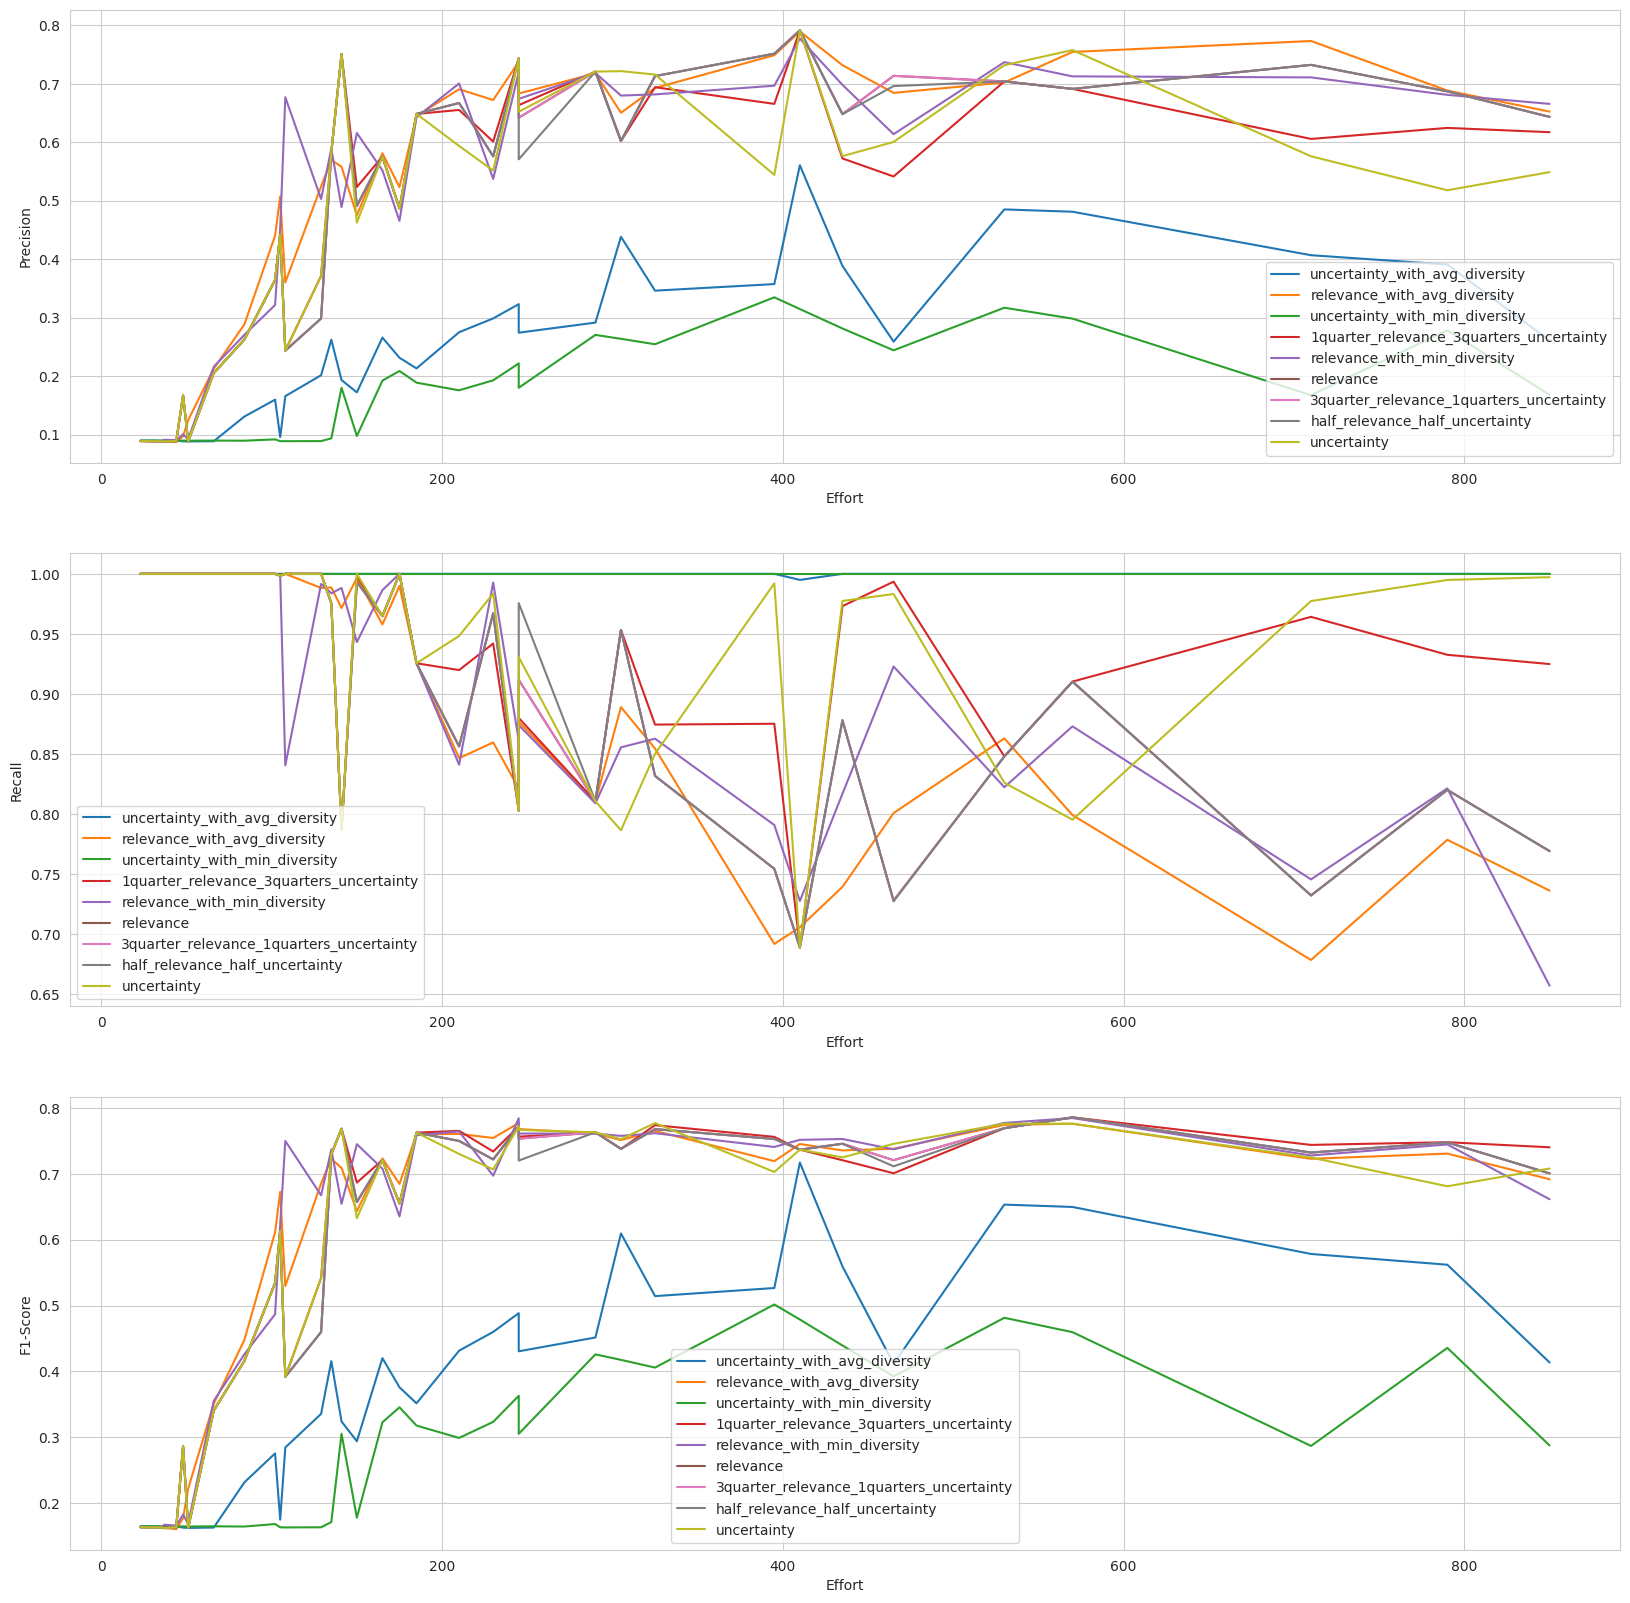

In [35]:
sns.set_style('whitegrid')

fig, ax = plt.subplots(3,1,figsize=(20,20))

for ranking_function in ranking_functions:
    auxdf=results[results['Ranking Function']==ranking_function]
    auxdf=auxdf.sort_values(by='Effort')

    #Precision
    metric='Precision'
    x = auxdf['Effort']
    y = auxdf[metric]
    ax[0].plot(x,y, label=ranking_function)

    #Recall
    metric='Recall'
    x = auxdf['Effort']
    y = auxdf[metric]
    ax[1].plot(x,y, label=ranking_function)

    #F1-Score
    metric='F1-Score'
    x = auxdf['Effort']
    y = auxdf[metric]
    ax[2].plot(x,y, label=ranking_function)
    
ax[0].set_xlabel('Effort')
ax[1].set_xlabel('Effort')
ax[2].set_xlabel('Effort')
ax[0].set_ylabel('Precision')
ax[1].set_ylabel('Recall')
ax[2].set_ylabel('F1-Score')
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [26]:
auxdf

,Seed,N,n,Effort,Accuracy,Precision,Recall,F1-Score,Relevant labeled,TP,TN,FP,FN,Prevalence,Model,representation,Ranking Function,Dataset
8,2474260.0,364.0,1.0,23.0,0.095619,0.090355,1.000000,0.165735,2.0,652.0,42.0,6564.0,0.0,0.060577,svm,bow,uncertainty,displaced_persons
17,2474260.0,364.0,1.0,23.0,0.089281,0.089281,1.000000,0.163926,6.0,648.0,0.0,6610.0,0.0,0.051923,svm,glove,uncertainty,displaced_persons
26,2474260.0,364.0,1.0,23.0,0.089143,0.089143,1.000000,0.163694,7.0,647.0,0.0,6611.0,0.0,0.072115,svm,sbert,uncertainty,displaced_persons
35,2474260.0,364.0,1.0,23.0,0.088867,0.088867,1.000000,0.163229,9.0,645.0,0.0,6613.0,0.0,0.135577,logreg,bow,uncertainty,displaced_persons
44,2474260.0,364.0,1.0,23.0,0.896252,0.461201,0.973725,0.625931,7.0,630.0,5875.0,736.0,17.0,0.080769,logreg,glove,uncertainty,displaced_persons
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782,2474260.0,7282.0,20.0,850.0,0.959571,0.598400,0.976501,0.742063,271.0,374.0,5797.0,251.0,9.0,0.088865,svm,sbert,uncertainty,displaced_persons
773,2474260.0,7282.0,20.0,850.0,0.834396,0.260417,1.000000,0.413223,279.0,375.0,4991.0,1065.0,0.0,0.098100,svm,glove,uncertainty,displaced_persons
764,2474260.0,7282.0,20.0,850.0,0.126263,0.068159,1.000000,0.127620,243.0,411.0,401.0,5619.0,0.0,0.089348,svm,bow,uncertainty,displaced_persons
809,2474260.0,7282.0,20.0,850.0,0.914632,0.403700,0.997312,0.574748,282.0,371.0,5511.0,548.0,1.0,0.097127,logreg,sbert,uncertainty,displaced_persons


In [27]:
len(set(auxdf['Effort']))

34